# 사용할 모듈 import 하기

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# assign()
def assign(point, centroids, k):
  return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))

# compute_centroids() -> 새로운 centroid를 계산하는 함수
def compute_centroids(assignments, points, k):

  # 처음에 0 으로 다 초기화
  vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
  counts = [0] * k

  # 각 point 들의 vector sum을 구하고 count도 하기
  for i, p in zip(assignments, points):
    vec_sum[i] += p
    counts[i] += 1

  # 평균점 구하기
  return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]

# K-Means

def kmeans(k, points):
  prev_assignment = []

  # 1. 임의로 k개의 점을 중심점으로 선택 (forgy)
  centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]

  for epoch in range(10):
    # 2. 각 점이 할당될 중심점을 계산
    assignments = [assign(p, centroids, k) for p in points]

    # 3. 새로운 centroid 계산
    centroids = compute_centroids(assignments, points, k)
    
    if prev_assignment == assignments: 
      break # 4. 클러스터에 변화가 없을 경우 종료 -> 이전 == 이후 (prev_assignment == assignment)

    prev_assignment = assignments

  return assignments, centroids


# 테스트 해보기

In [18]:
# 데이터 생성 
k= 3

points = [np.random.randn(k) for _ in range(80)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)

# kmeans 실행
assignments, centroids = kmeans(k, points)

In [19]:
points

array([[-4.21503572e-01,  6.05672507e-01, -3.91432640e-02],
       [-6.93897976e-02,  1.53711048e+00, -7.96684782e-01],
       [-3.61521758e-01, -5.51017192e-01, -1.59844462e-01],
       [-1.18305954e+00, -7.66014730e-01, -7.47457761e-01],
       [ 3.51820036e-01,  7.19040697e-01,  1.03033533e+00],
       [ 8.71288268e-01,  7.14348814e-01, -6.34903697e-01],
       [ 8.08138313e-01, -9.70077444e-01, -1.35510592e+00],
       [-1.79286956e-01, -1.67695442e+00, -7.18536839e-01],
       [ 2.20549432e+00, -1.29155544e-01, -1.63549160e+00],
       [-6.03299447e-01,  6.44427789e-01, -4.99981814e-01],
       [ 9.01982358e-01, -1.07733870e+00, -5.81658669e-01],
       [-1.36946953e+00, -1.63306934e-01, -1.34083049e+00],
       [ 1.68684634e-01,  4.79966792e-01, -7.64203254e-01],
       [-2.22936364e+00,  1.08079010e+00,  1.80625733e+00],
       [ 6.44521709e-01, -1.62570979e+00,  1.53935218e+00],
       [-3.50210449e-01,  1.32216332e-01, -1.58078778e+00],
       [ 4.60438399e-01,  8.56701512e-01

In [20]:
print("assignments: ", end = "")
for x in assignments:
    print(x, end = " ")

print()
print("centroids: ", centroids)

assignments: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 
centroids:  [array([5.13693405, 5.36457287, 5.25902535]), array([ 0.18347327,  0.03699119, -0.03529323]), array([10.43148289,  4.8749385 ,  0.11150363])]


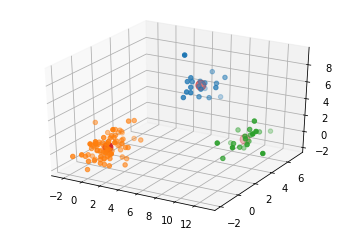

In [21]:
# 결과 확인하기
fig = plt.figure()
ax = fig.gca(projection='3d') # 3d로 보겠다

clusters = [[] for _ in range(k)]

for a, p in zip(assignments, points):
   clusters[a].append(p)

for cluster in clusters:
   ax.scatter(*zip(*cluster))
   
ax.scatter(*zip(*centroids), s=100)
plt.show()

# 이미지 처리 응용

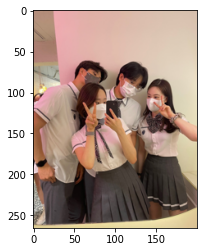

In [22]:
from PIL import Image
# 사진 불러오기
im = Image.open("lotteworld2.JPG")

# 크기 지정
width = 200
height = im.height * width // im.width
im = im.resize((width, height))

plt.imshow(im)
plt.show()

# k-means 적용, 결과 확인

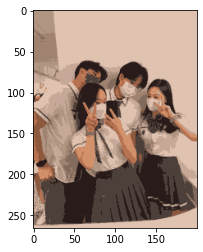

In [23]:
# 데이터 준비 & k-means 알고리즘 적용
pixels = np.array(im).reshape(-1, 3) 
assignments, centroids = kmeans(10, pixels)

# 모든 픽셀의 색을 centroid중 하나로 선택
for a, i in zip(assignments, range(pixels.shape[0])):
   pixels[i] = centroids[a]

# 바뀐 그림 출력
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB') 
plt.imshow(im_remastered)
plt.show()

# k-means using sklearn

In [24]:
from sklearn.cluster import KMeans

pixels = np.array(im).reshape(-1, 3) 
kmeans = KMeans(n_clusters=10)
kmeans.fit(pixels)

for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
   pixels[i] = kmeans.cluster_centers_[a]

print(pixels)

[[163 134 116]
 [188 161 143]
 [188 161 143]
 ...
 [222 180 169]
 [222 180 169]
 [222 180 169]]


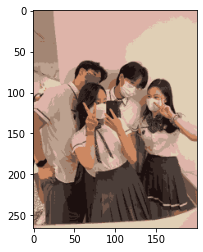

In [25]:
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB') 
plt.imshow(im_remastered)
plt.show()